In [1]:
import load_mnist
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import neural_net as nn

In [2]:
train, test = load_mnist.load_data()

In [3]:
X, y = load_mnist.seperate(train)

In [4]:
neuralNet = nn.Network([784, 128, 10])

In [5]:
print(X.shape, y.shape)

(60000, 784) (60000, 10)


In [6]:
history = neuralNet.stochasticGD(X, y, 0.33, 12, 64, lambda_=0.05, cv=0.1, both=True)

Epoch 1 : Trainig Cost = 0.93374854, Training Accuracy = 0.86446296
          CV Cost = 1.30098606, CV Accuracy = 0.8885
Epoch 2 : Trainig Cost = 0.71291783, Training Accuracy = 0.90025926
          CV Cost = 0.94008124, CV Accuracy = 0.91916667
Epoch 3 : Trainig Cost = 0.59627449, Training Accuracy = 0.91685185
          CV Cost = 0.72434458, CV Accuracy = 0.9315
Epoch 4 : Trainig Cost = 0.51336961, Training Accuracy = 0.92757407
          CV Cost = 0.5817776, CV Accuracy = 0.93983333
Epoch 5 : Trainig Cost = 0.45451964, Training Accuracy = 0.93662963
          CV Cost = 0.48586957, CV Accuracy = 0.94733333
Epoch 6 : Trainig Cost = 0.42421455, Training Accuracy = 0.94242593
          CV Cost = 0.42976663, CV Accuracy = 0.95066667
Epoch 7 : Trainig Cost = 0.39607086, Training Accuracy = 0.9472037
          CV Cost = 0.3926267, CV Accuracy = 0.95266667
Epoch 8 : Trainig Cost = 0.38053851, Training Accuracy = 0.94877778
          CV Cost = 0.36399053, CV Accuracy = 0.957
Epoch 9 : Traini

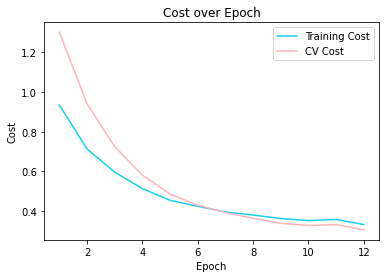

In [7]:
# Training and Cross Validation Cost History Graph
neuralNet.costHistory(history)

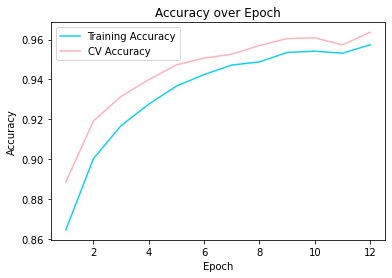

In [8]:
# Training and Cross Validation Accuracy History Graph
neuralNet.accurHistory(history)

In [9]:
# Function for digit prediction 
def predict(X, h, display=True):
    n = np.random.randint(0, len(h))
    predict = np.argmax(h, axis=1)[n]
    print("Prediction: " + str(predict))

    if display:
        fig, (ax1, ax2) = plt.subplots(figsize=(6.4, 4),ncols=2)
        img_set = np.asfarray(X)
        img = img_set[n].reshape((28,28))
        ax1.imshow(img, cmap="Greys")
        ax1.set_title("Test Image")
        ax1.axis('off')

        ax2.bar([i for i in range(len(h[n]))],list(h[n]))
        ax2.set_xticks([i for i in range(10)])
        ax2.set_yticks([0.2 * i for i in range(1, 6)])
        asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
        ax2.set_aspect(asp)

        ax2.set_title("Model Confidence for Each Label")
        ax2.set_ylabel("Confidence")
        ax2.set_xlabel("Labels")

        fig.tight_layout()
        plt.show()

Prediction: 0


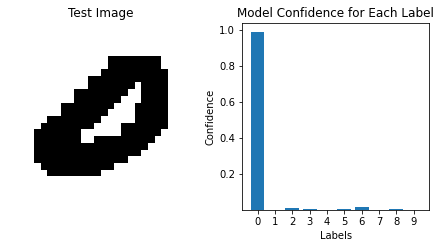

In [10]:
# Get Predictions
predictions = neuralNet.forwardFeed(X)
predict(X, predictions)

In [11]:
X_test, y_test = load_mnist.seperate(test)

In [12]:
h_test = neuralNet.forwardFeed(X_test)

In [13]:
test_accuracy = neuralNet.accuracy(h_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9548
